In [5]:
cd C:\\Users\\rahat\\OneDrive\\Documents\\Current_projects\\DS_transformation\\Portfolio

C:\Users\rahat\OneDrive\Documents\Current_projects\DS_transformation\Portfolio


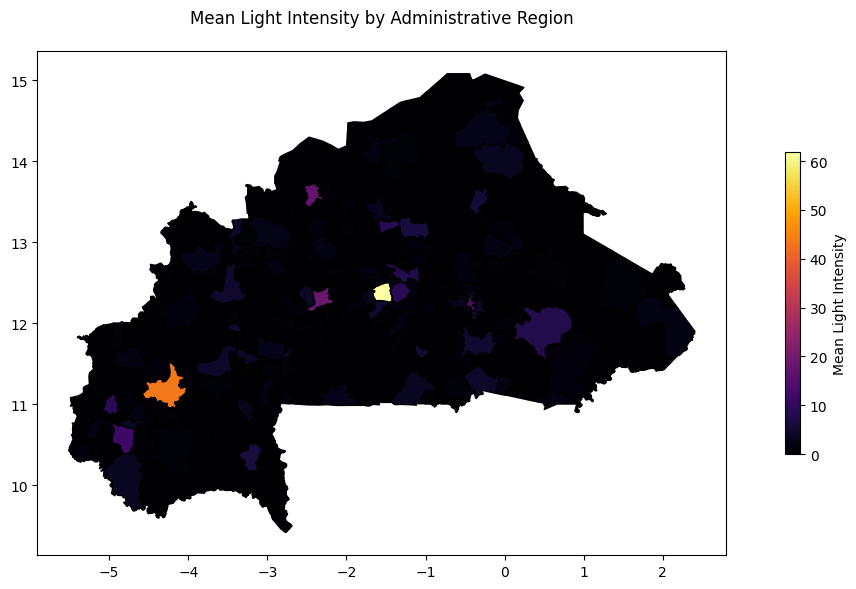

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

# Function to process and visualize light intensity data by administrative regions
def process_light_intensity(shapefile_path, pop_raster_path, light_raster_path, output_csv, output_plot):
    # Load administrative boundaries
    admin_boundaries = gpd.read_file(shapefile_path)

    # Compute zonal statistics for both datasets
    pop_zonal_stats = zonal_stats(admin_boundaries, pop_raster_path, stats=["mean", "sum"])
    light_zonal_stats = zonal_stats(admin_boundaries, light_raster_path, stats=["mean", "sum"])

    # Assign results to GeoDataFrame
    admin_boundaries["mean_population"] = [z["mean"] for z in pop_zonal_stats]
    admin_boundaries["total_population"] = [z["sum"] for z in pop_zonal_stats]
    admin_boundaries["mean_light"] = [z["mean"] for z in light_zonal_stats]
    admin_boundaries["total_light"] = [z["sum"] for z in light_zonal_stats]

    # Save results as CSV
    admin_boundaries[["ADM3_FR", "mean_population", "total_population", "mean_light", "total_light"]].to_csv(output_csv, index=False)

    # Plot choropleth map for light intensity
    fig, ax = plt.subplots(figsize=(12, 6))
    admin_boundaries.plot(
        column="mean_light",
        cmap="inferno",
        edgecolor="black",
        legend=True,
        legend_kwds={"shrink": 0.6, "label": "Mean Light Intensity", "orientation": "vertical"},
        ax=ax
    )

    # Adjust title position with padding
    plt.title("Mean Light Intensity by Administrative Region", pad=20)

    # Automatically adjust layout to prevent overlap
    plt.tight_layout()

    # Save plot
    plt.savefig(output_plot)
    plt.show()

# Example usage
shapefile_path = "bfa_admbnda_adm3_igb_20200323.shp"  #  file path
pop_raster_path = "BFA_set_pop.tif"  # Replace with actual file path
light_raster_path = "BFA_set_zscore_2013.tif"  # Replace with actual file path
output_csv = "BFA_population_light_intensity.csv"
output_plot = "BFA_light_intensity_map.png"

process_light_intensity(shapefile_path, pop_raster_path, light_raster_path, output_csv, output_plot)


In [8]:
import geopandas as gpd

# Load shapefile
shapefile_path = "bfa_admbnda_adm3_igb_20200323.shp"  # Burkina Faso example
admin_boundaries = gpd.read_file(shapefile_path)

# Print available columns to check correct column name
print(admin_boundaries.columns)


Index(['Shape_Leng', 'Shape_Area', 'ADM3_FR', 'ADM3_PCODE', 'ADM3_REF',
       'ADM3ALT1FR', 'ADM3ALT2FR', 'ADM2_FR', 'ADM2_PCODE', 'ADM1_FR',
       'ADM1_PCODE', 'ADM0_FR', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'geometry'],
      dtype='object')
